<a href="https://colab.research.google.com/github/steffenmodest/notebooks-1/blob/master/h2o_autoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install h2o

In [0]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfj450bu4
  JVM stdout: /tmp/tmpfj450bu4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfj450bu4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_unknownUser_cx1zt5
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
diabetes_df = h2o.import_file("diabetes.csv", destination_frame="diabetes_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
diabetes_df.describe()

Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


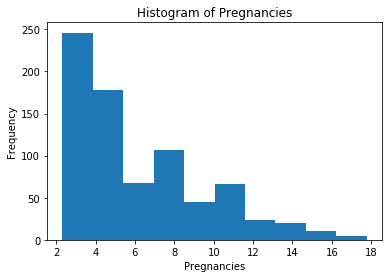

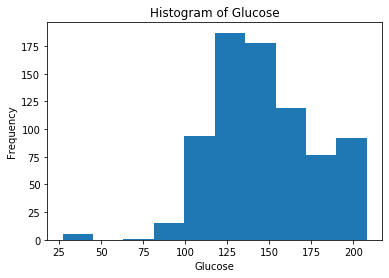

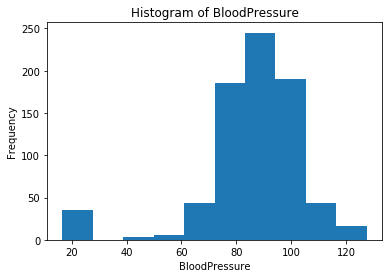

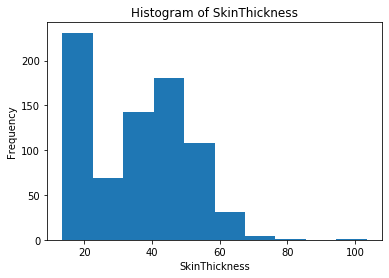

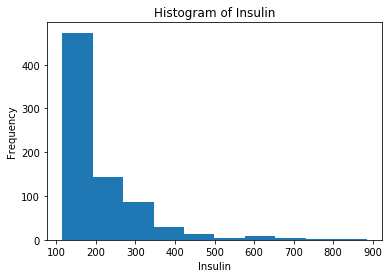

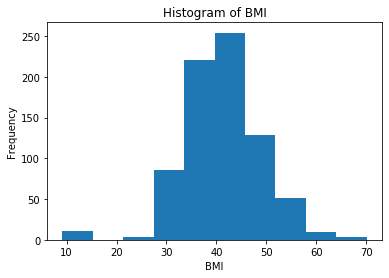

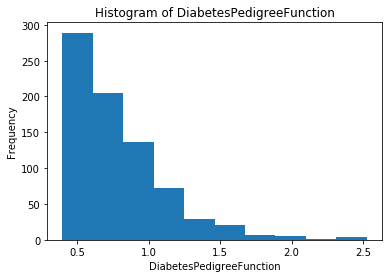

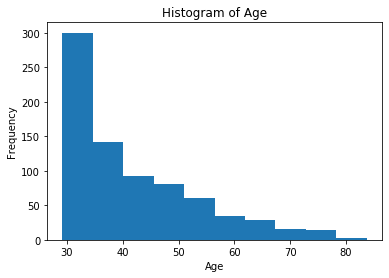

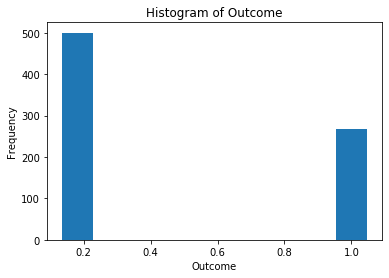

In [0]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

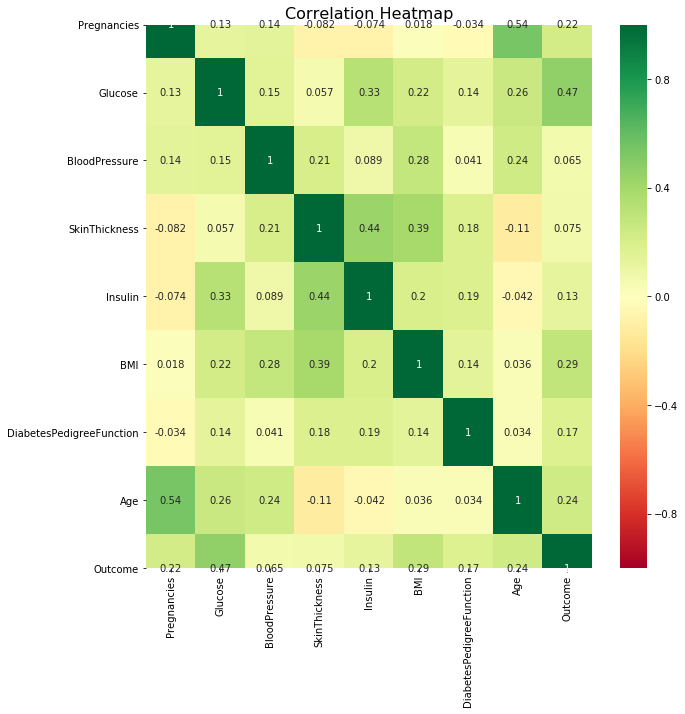

In [0]:
plt.figure(figsize=(10,10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [0]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [0]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
train.col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [0]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1575412027691_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11551.0,5.0,5.0,5.0,6.0,23.0,13.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
pr_auc: 0.9784923662885114
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,,0,1,Error,Rate
0,0,290.0,9.0,0.0301,(9.0/299.0)
1,1,14.0,152.0,0.0843,(14.0/166.0)
2,Total,304.0,161.0,0.0495,(23.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462205,0.929664,150.0
1,max f2,0.323826,0.944836,176.0
2,max f0point5,0.548022,0.967302,132.0
3,max accuracy,0.506976,0.950538,142.0
4,max precision,0.983850,1.000000,0.0
5,max recall,0.173383,1.000000,227.0
6,max specificity,0.983850,1.000000,0.0
7,max absolute_mcc,0.506976,0.892066,142.0
8,max min_per_class_accuracy,0.372134,0.939799,163.0
9,max mean_per_class_accuracy,0.370458,0.945803,164.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010753,0.964760,2.801205,2.801205,1.000000,0.970134,1.000000,0.970134,0.030120,0.030120,180.120482,180.120482
1,,2,0.021505,0.959842,2.801205,2.801205,1.000000,0.963441,1.000000,0.966788,0.030120,0.060241,180.120482,180.120482
2,,3,0.030108,0.948198,2.801205,2.801205,1.000000,0.952824,1.000000,0.962798,0.024096,0.084337,180.120482,180.120482
3,,4,0.040860,0.944016,2.801205,2.801205,1.000000,0.946246,1.000000,0.958442,0.030120,0.114458,180.120482,180.120482
4,,5,0.051613,0.940243,2.801205,2.801205,1.000000,0.942268,1.000000,0.955073,0.030120,0.144578,180.120482,180.120482
5,,6,0.101075,0.910936,2.801205,2.801205,1.000000,0.924669,1.000000,0.940194,0.138554,0.283133,180.120482,180.120482
6,,7,0.150538,0.868553,2.801205,2.801205,1.000000,0.889815,1.000000,0.923641,0.138554,0.421687,180.120482,180.120482
7,,8,0.200000,0.797054,2.801205,2.801205,1.000000,0.834641,1.000000,0.901630,0.138554,0.560241,180.120482,180.120482
8,,9,0.301075,0.556327,2.801205,2.801205,1.000000,0.680179,1.000000,0.827286,0.283133,0.843373,180.120482,180.120482
9,,10,0.400000,0.326087,1.157019,2.394578,0.413043,0.441848,0.854839,0.731963,0.114458,0.957831,15.701938,139.457831




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-12-03 22:47:39,0.044 sec,0.0,0.479112,0.651666,0.500000,0.000000,1.000000,0.643011
1,,2019-12-03 22:47:40,0.425 sec,1.0,0.456602,0.606210,0.899111,0.572683,2.801205,0.178495
2,,2019-12-03 22:47:40,0.465 sec,2.0,0.437174,0.568855,0.918050,0.669955,2.801205,0.154839
3,,2019-12-03 22:47:40,0.495 sec,3.0,0.420575,0.537898,0.919994,0.672056,2.801205,0.156989
4,,2019-12-03 22:47:40,0.523 sec,4.0,0.405987,0.511169,0.925938,0.840134,2.801205,0.148387
5,,2019-12-03 22:47:40,0.553 sec,5.0,0.392586,0.486722,0.934239,0.876386,2.801205,0.141935
6,,2019-12-03 22:47:40,0.583 sec,6.0,0.380476,0.464792,0.937936,0.881787,2.801205,0.141935
7,,2019-12-03 22:47:40,0.615 sec,7.0,0.370456,0.446541,0.939205,0.883794,2.801205,0.139785
8,,2019-12-03 22:47:40,0.645 sec,8.0,0.362031,0.431383,0.942207,0.900589,2.801205,0.133333
9,,2019-12-03 22:47:40,0.679 sec,9.0,0.355361,0.418882,0.941834,0.901214,2.801205,0.133333



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,160.889725,1.000000,0.386115
1,BMI,107.157028,0.666028,0.257163
2,DiabetesPedigreeFunction,49.382526,0.306934,0.118512
3,Age,28.789474,0.178939,0.069091
4,BloodPressure,24.516136,0.152379,0.058836
5,Pregnancies,22.055462,0.137084,0.052930
6,Insulin,12.949581,0.080487,0.031077
7,SkinThickness,10.949017,0.068053,0.026276


In [0]:
gbm.scoring_history

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1575412027691_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11551.0,5.0,5.0,5.0,6.0,23.0,13.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
pr_auc: 0.9784923662885114
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,,0,1,Error,Rate
0,0,290.0,9.0,0.0301,(9.0/299.0)
1,1,14.0,152.0,0.0843,(14.0/166.0)
2,Total,304.0,161.0,0.0495,(23.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462205,0.929664,150.0
1,max f2,0.323826,0.944836,176.0
2,max f0point5,0.548022,0.967302,132.0
3,max accuracy,0.506976,0.950538,142.0
4,max precision,0.983850,1.000000,0.0
5,max recall,0.173383,1.000000,227.0
6,max specificity,0.983850,1.000000,0.0
7,max absolute_mcc,0.506976,0.892066,142.0
8,max min_per_class_accuracy,0.372134,0.939799,163.0
9,max mean_per_class_accuracy,0.370458,0.945803,164.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010753,0.964760,2.801205,2.801205,1.000000,0.970134,1.000000,0.970134,0.030120,0.030120,180.120482,180.120482
1,,2,0.021505,0.959842,2.801205,2.801205,1.000000,0.963441,1.000000,0.966788,0.030120,0.060241,180.120482,180.120482
2,,3,0.030108,0.948198,2.801205,2.801205,1.000000,0.952824,1.000000,0.962798,0.024096,0.084337,180.120482,180.120482
3,,4,0.040860,0.944016,2.801205,2.801205,1.000000,0.946246,1.000000,0.958442,0.030120,0.114458,180.120482,180.120482
4,,5,0.051613,0.940243,2.801205,2.801205,1.000000,0.942268,1.000000,0.955073,0.030120,0.144578,180.120482,180.120482
5,,6,0.101075,0.910936,2.801205,2.801205,1.000000,0.924669,1.000000,0.940194,0.138554,0.283133,180.120482,180.120482
6,,7,0.150538,0.868553,2.801205,2.801205,1.000000,0.889815,1.000000,0.923641,0.138554,0.421687,180.120482,180.120482
7,,8,0.200000,0.797054,2.801205,2.801205,1.000000,0.834641,1.000000,0.901630,0.138554,0.560241,180.120482,180.120482
8,,9,0.301075,0.556327,2.801205,2.801205,1.000000,0.680179,1.000000,0.827286,0.283133,0.843373,180.120482,180.120482
9,,10,0.400000,0.326087,1.157019,2.394578,0.413043,0.441848,0.854839,0.731963,0.114458,0.957831,15.701938,139.457831




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-12-03 22:47:39,0.044 sec,0.0,0.479112,0.651666,0.500000,0.000000,1.000000,0.643011
1,,2019-12-03 22:47:40,0.425 sec,1.0,0.456602,0.606210,0.899111,0.572683,2.801205,0.178495
2,,2019-12-03 22:47:40,0.465 sec,2.0,0.437174,0.568855,0.918050,0.669955,2.801205,0.154839
3,,2019-12-03 22:47:40,0.495 sec,3.0,0.420575,0.537898,0.919994,0.672056,2.801205,0.156989
4,,2019-12-03 22:47:40,0.523 sec,4.0,0.405987,0.511169,0.925938,0.840134,2.801205,0.148387
5,,2019-12-03 22:47:40,0.553 sec,5.0,0.392586,0.486722,0.934239,0.876386,2.801205,0.141935
6,,2019-12-03 22:47:40,0.583 sec,6.0,0.380476,0.464792,0.937936,0.881787,2.801205,0.141935
7,,2019-12-03 22:47:40,0.615 sec,7.0,0.370456,0.446541,0.939205,0.883794,2.801205,0.139785
8,,2019-12-03 22:47:40,0.645 sec,8.0,0.362031,0.431383,0.942207,0.900589,2.801205,0.133333
9,,2019-12-03 22:47:40,0.679 sec,9.0,0.355361,0.418882,0.941834,0.901214,2.801205,0.133333



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,160.889725,1.000000,0.386115
1,BMI,107.157028,0.666028,0.257163
2,DiabetesPedigreeFunction,49.382526,0.306934,0.118512
3,Age,28.789474,0.178939,0.069091
4,BloodPressure,24.516136,0.152379,0.058836
5,Pregnancies,22.055462,0.137084,0.052930
6,Insulin,12.949581,0.080487,0.031077
7,SkinThickness,10.949017,0.068053,0.026276


<bound method ModelBase.scoring_history of >

In [0]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
pr_auc: 0.6269893119126704
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,,0,1,Error,Rate
0,0,53.0,44.0,0.4536,(44.0/97.0)
1,1,3.0,48.0,0.0588,(3.0/51.0)
2,Total,56.0,92.0,0.3176,(47.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.145839,0.671329,91.0
1,max f2,0.112531,0.819936,106.0
2,max f0point5,0.668426,0.642458,31.0
3,max accuracy,0.668426,0.750000,31.0
4,max precision,0.980739,1.000000,0.0
5,max recall,0.112531,1.000000,106.0
6,max specificity,0.980739,1.000000,0.0
7,max absolute_mcc,0.145839,0.477769,91.0
8,max min_per_class_accuracy,0.328581,0.686275,64.0
9,max mean_per_class_accuracy,0.145839,0.743784,91.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013514,0.973098,1.450980,1.450980,0.500000,0.977228,0.500000,0.977228,0.019608,0.019608,45.098039,45.098039
1,,2,0.020270,0.966872,2.901961,1.934641,1.000000,0.972400,0.666667,0.975618,0.019608,0.039216,190.196078,93.464052
2,,3,0.033784,0.952356,2.901961,2.321569,1.000000,0.963776,0.800000,0.970881,0.039216,0.078431,190.196078,132.156863
3,,4,0.040541,0.927994,2.901961,2.418301,1.000000,0.939870,0.833333,0.965713,0.019608,0.098039,190.196078,141.830065
4,,5,0.054054,0.923162,1.450980,2.176471,0.500000,0.925415,0.750000,0.955638,0.019608,0.117647,45.098039,117.647059
5,,6,0.101351,0.892244,2.072829,2.128105,0.714286,0.906349,0.733333,0.932637,0.098039,0.215686,107.282913,112.810458
6,,7,0.155405,0.836001,2.176471,2.144928,0.750000,0.861825,0.739130,0.908006,0.117647,0.333333,117.647059,114.492754
7,,8,0.202703,0.722515,1.658263,2.031373,0.571429,0.773092,0.700000,0.876527,0.078431,0.411765,65.826331,103.137255
8,,9,0.304054,0.517149,1.547712,1.870153,0.533333,0.605657,0.644444,0.786237,0.156863,0.568627,54.771242,87.015251
9,,10,0.398649,0.409838,1.036415,1.672316,0.357143,0.461534,0.576271,0.709188,0.098039,0.666667,3.641457,67.231638


In [0]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [0]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5610332739005056
1          12  depth_grid_model_5  0.5610431620153586
2           8  depth_grid_model_3  0.5618675574114658
3           6  depth_grid_model_2  0.5688369200105283
4           4  depth_grid_model_1  0.5720338350452505



In [0]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          12  depth_grid_model_5  0.8067515666060238
1          10  depth_grid_model_4  0.8067515666060238
2           8  depth_grid_model_3  0.8033151404891854
3           6  depth_grid_model_2  0.8031129977764302
4           4  depth_grid_model_1  0.7984637153830605



In [0]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train.rbind(valid))
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.74831593,0.032682635,0.7565789,0.70186335,0.75625,0.7785714
1,auc,0.82596457,0.02783469,0.85436535,0.7935103,0.8128881,0.8430944
2,err,0.25168407,0.032682635,0.24342105,0.29813665,0.24375,0.22142857
3,err_count,38.75,7.0415435,37.0,48.0,39.0,31.0
4,f0point5,0.6394386,0.06726909,0.6658291,0.53977275,0.6646526,0.6875
5,f1,0.6966428,0.060147557,0.74125874,0.61290324,0.6929134,0.7394958
6,f2,0.7671504,0.060800605,0.8359621,0.7089552,0.7236842,0.8
7,lift_top_group,2.4254863,0.50047225,2.6206896,1.6770834,2.7118645,2.6923077
8,logloss,0.49002537,0.022035236,0.46362165,0.5093592,0.50698996,0.4801307
9,max_per_class_error,0.2980774,0.0466294,0.34042552,0.33628318,0.2542373,0.26136363


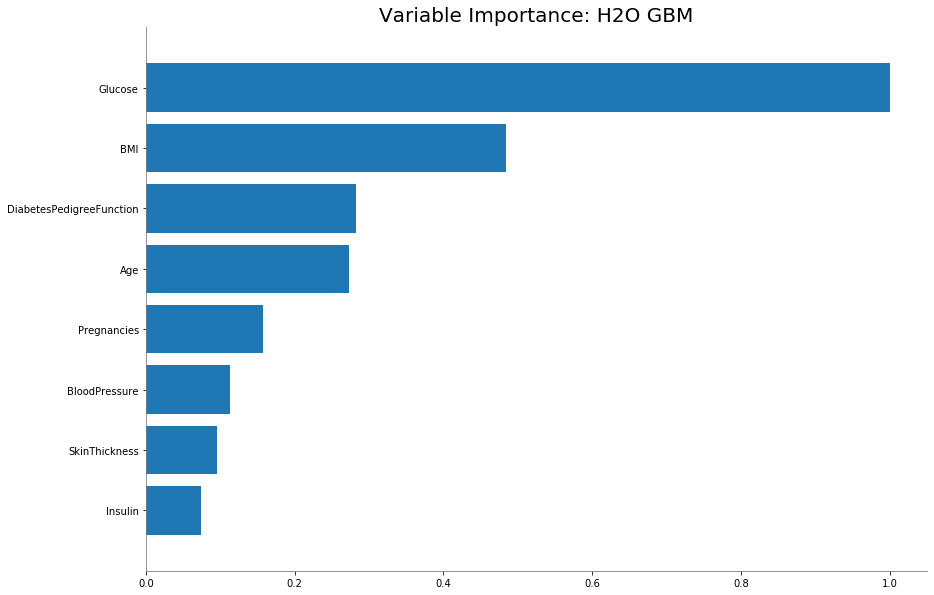

In [0]:
cv_gbm.varimp_plot()

In [0]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 20, max_runtime_secs=200, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20191203_230734,0.841772,0.47196,0.230165,0.389803,0.151946
XGBoost_1_AutoML_20191203_230734,0.839767,0.472651,0.234537,0.391675,0.153409
XGBoost_1_AutoML_20191203_230541,0.839767,0.472651,0.234537,0.391675,0.153409
StackedEnsemble_BestOfFamily_AutoML_20191203_230541,0.839273,0.474308,0.233832,0.391691,0.153422
XGBoost_3_AutoML_20191203_230541,0.837098,0.472615,0.229832,0.391861,0.153555
XGBoost_3_AutoML_20191203_230734,0.837098,0.472615,0.229832,0.391861,0.153555
StackedEnsemble_AllModels_AutoML_20191203_230541,0.835738,0.475944,0.234889,0.392334,0.153926
DeepLearning_1_AutoML_20191203_230734,0.835385,0.492198,0.234174,0.394938,0.155976
XGBoost_grid_1_AutoML_20191203_230734_model_4,0.833824,0.475361,0.235846,0.392458,0.154023
XRT_1_AutoML_20191203_230734,0.833451,0.548917,0.216475,0.395475,0.156401


In [0]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20191203_230734

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0791398893304937
RMSE: 0.28131812833604186
LogLoss: 0.28757391180791086
Null degrees of freedom: 464
Residual degrees of freedom: 458
Null deviance: 606.0495845742382
Residual deviance: 267.4437379813571
AIC: 281.4437379813571
AUC: 0.9751480839746947
pr_auc: 0.9488004517034491
Gini: 0.9502961679493893

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3269073648642466: 


,,0,1,Error,Rate
0,0,268.0,31.0,0.1037,(31.0/299.0)
1,1,8.0,158.0,0.0482,(8.0/166.0)
2,Total,276.0,189.0,0.0839,(39.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326907,0.890141,182.0
1,max f2,0.293925,0.932793,191.0
2,max f0point5,0.516375,0.892351,129.0
3,max accuracy,0.331665,0.916129,178.0
4,max precision,0.920158,1.000000,0.0
5,max recall,0.220905,1.000000,215.0
6,max specificity,0.920158,1.000000,0.0
7,max absolute_mcc,0.326907,0.827305,182.0
8,max min_per_class_accuracy,0.362429,0.909639,169.0
9,max mean_per_class_accuracy,0.308007,0.925072,187.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.47 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010753,0.910067,2.801205,2.801205,1.000000,0.915051,1.000000,0.915051,0.030120,0.030120,180.120482,180.120482
1,,2,0.021505,0.900393,2.801205,2.801205,1.000000,0.905621,1.000000,0.910336,0.030120,0.060241,180.120482,180.120482
2,,3,0.030108,0.896194,2.801205,2.801205,1.000000,0.897895,1.000000,0.906782,0.024096,0.084337,180.120482,180.120482
3,,4,0.040860,0.891841,2.801205,2.801205,1.000000,0.894196,1.000000,0.903470,0.030120,0.114458,180.120482,180.120482
4,,5,0.051613,0.887973,2.801205,2.801205,1.000000,0.890155,1.000000,0.900696,0.030120,0.144578,180.120482,180.120482
5,,6,0.101075,0.844965,2.801205,2.801205,1.000000,0.864925,1.000000,0.883191,0.138554,0.283133,180.120482,180.120482
6,,7,0.150538,0.784420,2.801205,2.801205,1.000000,0.816585,1.000000,0.861306,0.138554,0.421687,180.120482,180.120482
7,,8,0.200000,0.715164,2.679413,2.771084,0.956522,0.755746,0.989247,0.835200,0.132530,0.554217,167.941331,177.108434
8,,9,0.301075,0.497593,2.145604,2.561102,0.765957,0.608139,0.914286,0.758972,0.216867,0.771084,114.560369,156.110155
9,,10,0.400000,0.330246,1.705081,2.349398,0.608696,0.416884,0.838710,0.674370,0.168675,0.939759,70.508119,134.939759




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1651602932152325
RMSE: 0.40639917964389705
LogLoss: 0.49712692465156616
Null degrees of freedom: 147
Residual degrees of freedom: 141
Null deviance: 190.73426440369713
Residual deviance: 147.1495696968636
AIC: 161.1495696968636
AUC: 0.8239336971902163
pr_auc: 0.6905879336047595
Gini: 0.6478673943804325

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27186205403980007: 


,,0,1,Error,Rate
0,0,69.0,28.0,0.2887,(28.0/97.0)
1,1,11.0,40.0,0.2157,(11.0/51.0)
2,Total,80.0,68.0,0.2635,(39.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.271862,0.672269,67.0
1,max f2,0.146447,0.805369,93.0
2,max f0point5,0.619926,0.685714,30.0
3,max accuracy,0.619926,0.770270,30.0
4,max precision,0.887852,1.000000,0.0
5,max recall,0.115192,1.000000,116.0
6,max specificity,0.887852,1.000000,0.0
7,max absolute_mcc,0.271862,0.472661,67.0
8,max min_per_class_accuracy,0.284027,0.721649,63.0
9,max mean_per_class_accuracy,0.271862,0.747827,67.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 33.95 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013514,0.883048,2.901961,2.901961,1.000000,0.886866,1.000000,0.886866,0.039216,0.039216,190.196078,190.196078
1,,2,0.020270,0.879112,2.901961,2.901961,1.000000,0.879853,1.000000,0.884529,0.019608,0.058824,190.196078,190.196078
2,,3,0.033784,0.876224,2.901961,2.901961,1.000000,0.877777,1.000000,0.881828,0.039216,0.098039,190.196078,190.196078
3,,4,0.040541,0.869692,2.901961,2.901961,1.000000,0.875843,1.000000,0.880830,0.019608,0.117647,190.196078,190.196078
4,,5,0.054054,0.864287,1.450980,2.539216,0.500000,0.866746,0.875000,0.877309,0.019608,0.137255,45.098039,153.921569
5,,6,0.101351,0.825390,2.487395,2.515033,0.857143,0.843235,0.866667,0.861408,0.117647,0.254902,148.739496,151.503268
6,,7,0.155405,0.740263,1.813725,2.271100,0.625000,0.768849,0.782609,0.829213,0.098039,0.352941,81.372549,127.109974
7,,8,0.202703,0.624796,2.072829,2.224837,0.714286,0.664666,0.766667,0.790819,0.098039,0.450980,107.282913,122.483660
8,,9,0.304054,0.420858,1.354248,1.934641,0.466667,0.516861,0.666667,0.699500,0.137255,0.588235,35.424837,93.464052
9,,10,0.398649,0.313510,1.243697,1.770688,0.428571,0.360996,0.610169,0.619177,0.117647,0.705882,24.369748,77.068794




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1519463221576454
RMSE: 0.38980292733334543
LogLoss: 0.47195959652805136
Null degrees of freedom: 464
Residual degrees of freedom: 459
Null deviance: 609.578327460349
Residual deviance: 438.9224247710878
AIC: 450.9224247710878
AUC: 0.8417717693516541
pr_auc: 0.7161403833955793
Gini: 0.6835435387033082

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2764914323567595: 


,,0,1,Error,Rate
0,0,219.0,80.0,0.2676,(80.0/299.0)
1,1,32.0,134.0,0.1928,(32.0/166.0)
2,Total,251.0,214.0,0.2409,(112.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.276491,0.705263,200.0
1,max f2,0.165964,0.796046,275.0
2,max f0point5,0.582888,0.736677,110.0
3,max accuracy,0.582888,0.793548,110.0
4,max precision,0.765943,0.903226,56.0
5,max recall,0.080427,1.000000,394.0
6,max specificity,0.924793,0.996656,0.0
7,max absolute_mcc,0.417578,0.535309,148.0
8,max min_per_class_accuracy,0.301969,0.759036,183.0
9,max mean_per_class_accuracy,0.276491,0.769835,200.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010753,0.899445,1.120482,1.120482,0.400000,0.912806,0.400000,0.912806,0.012048,0.012048,12.048193,12.048193
1,,2,0.021505,0.887645,2.240964,1.680723,0.800000,0.895081,0.600000,0.903943,0.024096,0.036145,124.096386,68.072289
2,,3,0.030108,0.875685,2.801205,2.000861,1.000000,0.881806,0.714286,0.897618,0.024096,0.060241,180.120482,100.086059
3,,4,0.040860,0.870400,2.240964,2.064046,0.800000,0.874361,0.736842,0.891498,0.024096,0.084337,124.096386,106.404566
4,,5,0.051613,0.852967,2.801205,2.217620,1.000000,0.858251,0.791667,0.884572,0.030120,0.114458,180.120482,121.762048
5,,6,0.101075,0.805666,2.679413,2.443604,0.956522,0.831777,0.872340,0.858736,0.132530,0.246988,167.941331,144.360420
6,,7,0.150538,0.736583,2.070456,2.320998,0.739130,0.774648,0.828571,0.831107,0.102410,0.349398,107.045574,132.099828
7,,8,0.200000,0.662268,2.192247,2.289157,0.782609,0.705308,0.817204,0.799996,0.108434,0.457831,119.224725,128.915663
8,,9,0.301075,0.508850,1.668803,2.080895,0.595745,0.588272,0.742857,0.728917,0.168675,0.626506,66.880287,108.089501
9,,10,0.400000,0.319931,0.974332,1.807229,0.347826,0.407886,0.645161,0.649522,0.096386,0.722892,-2.566789,80.722892
